In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1820,2020-10-01,United Kingdom,449190.0,453264.0,42110.0,42143.0,-4074.0,-33.0
1821,2020-10-01,Germany,291037.0,291722.0,9501.0,9500.0,-685.0,1.0
1822,2020-10-01,Iran,456582.0,457219.0,26190.0,26169.0,-637.0,21.0
1823,2020-10-01,Turkey,318433.0,318663.0,8183.0,8195.0,-230.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11645.432328767123
RMSE =  41935.6007303044


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.55890410958904
RMSE =  810.913378141781


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  86069.55813953489
RMSE =  132806.99281410442
-- World performances for deaths --
MAE =  1941.8023255813953
RMSE =  2358.6108470680315


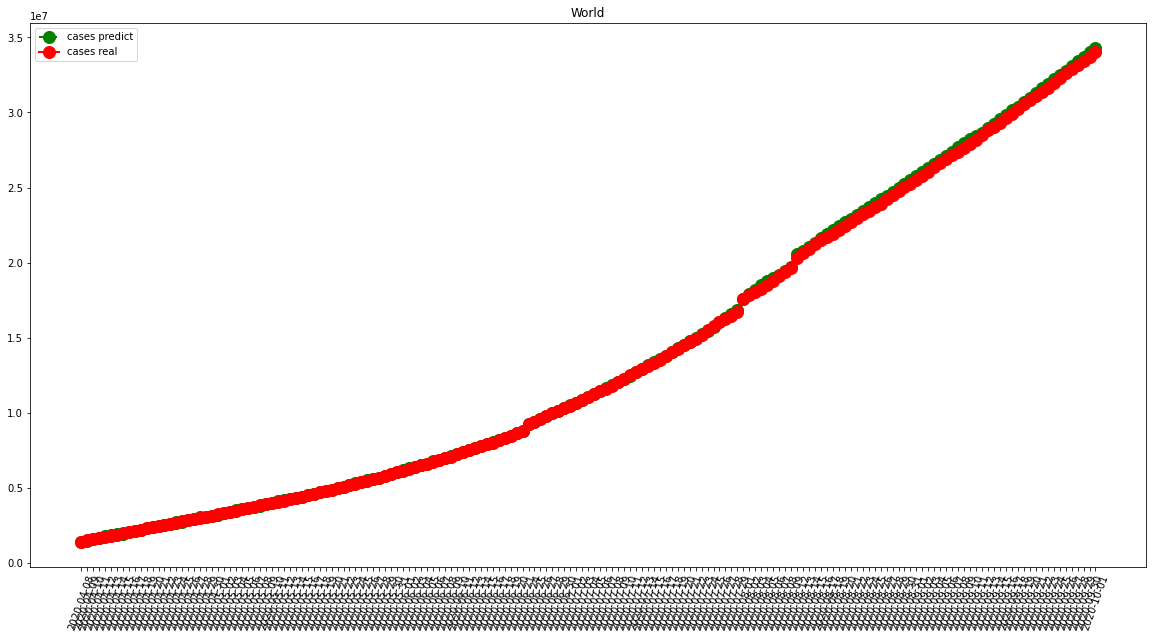

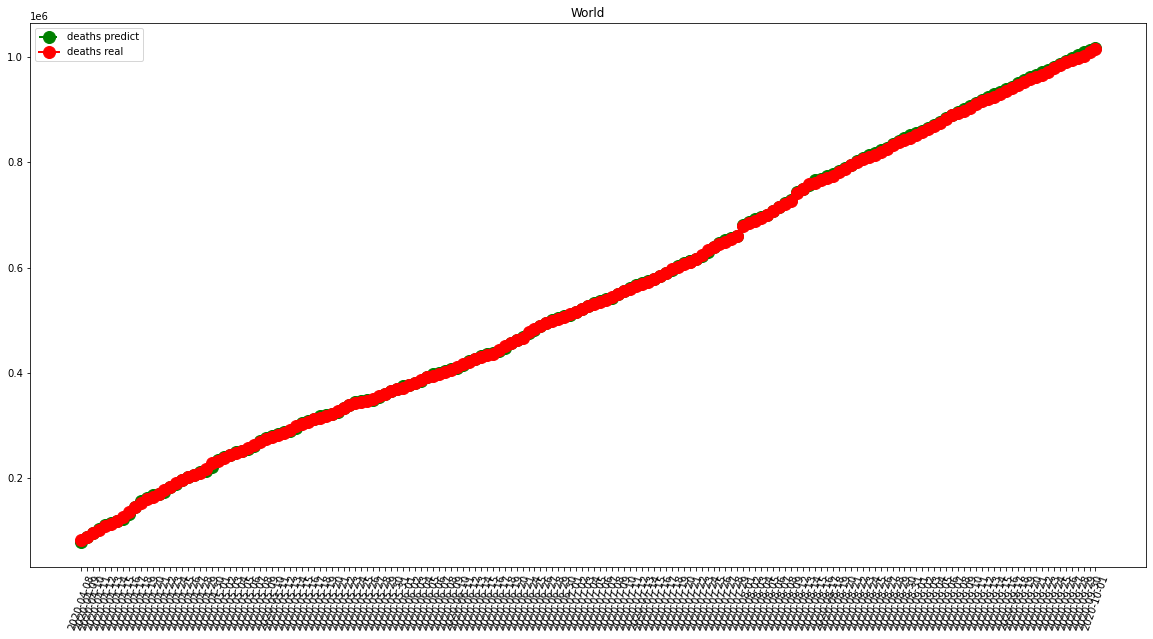

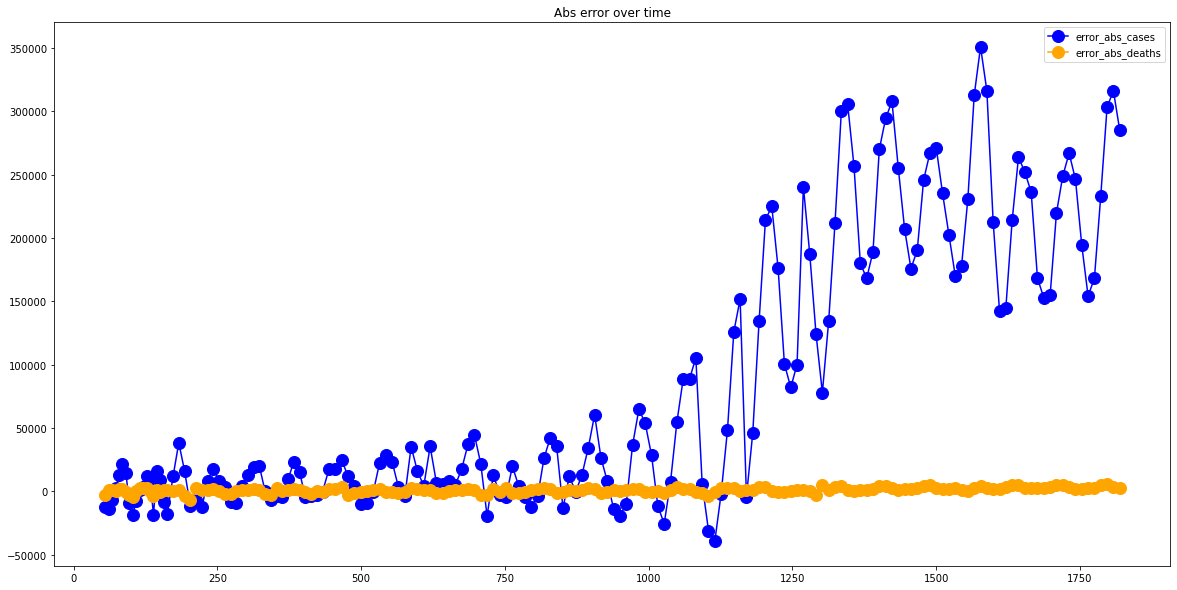

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1367.901098901099
RMSE =  2150.422151246454
-- France performances for deaths --
MAE =  108.14835164835165
RMSE =  249.3816859248595


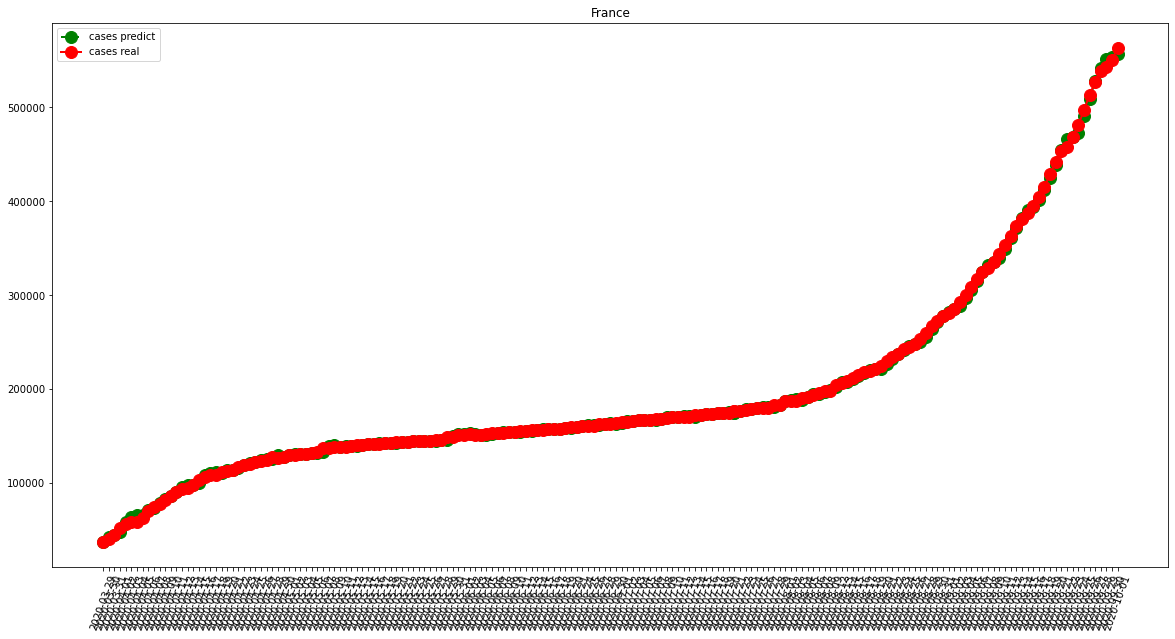

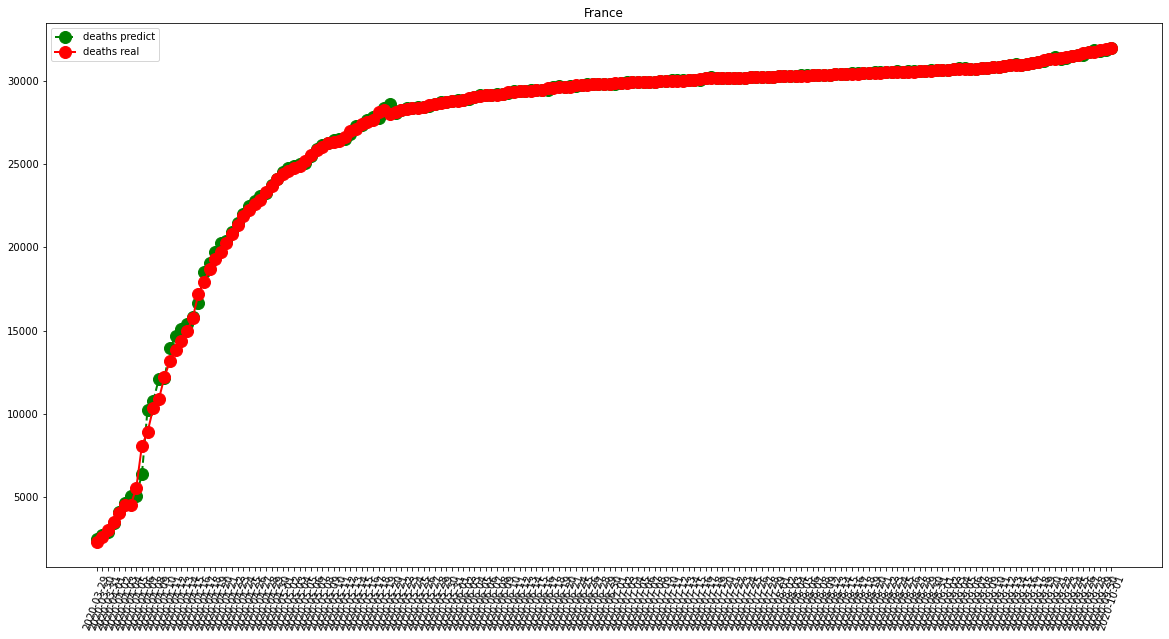

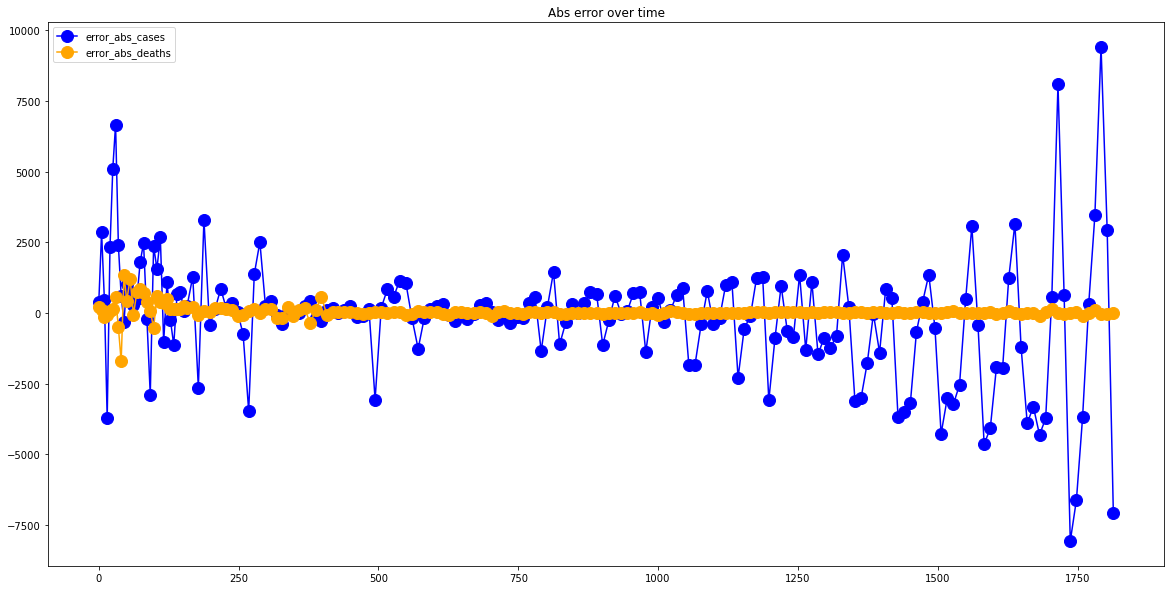

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.54395604395603
RMSE =  441.9642158952104
-- Italy performances for deaths --
MAE =  63.824175824175825
RMSE =  220.14116350226703


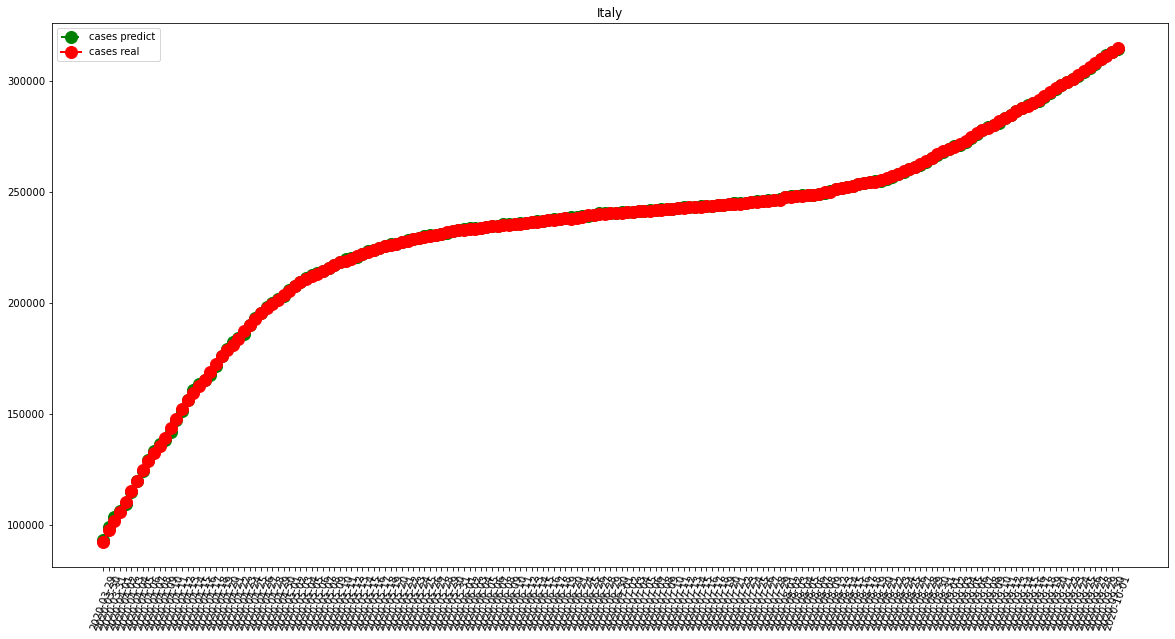

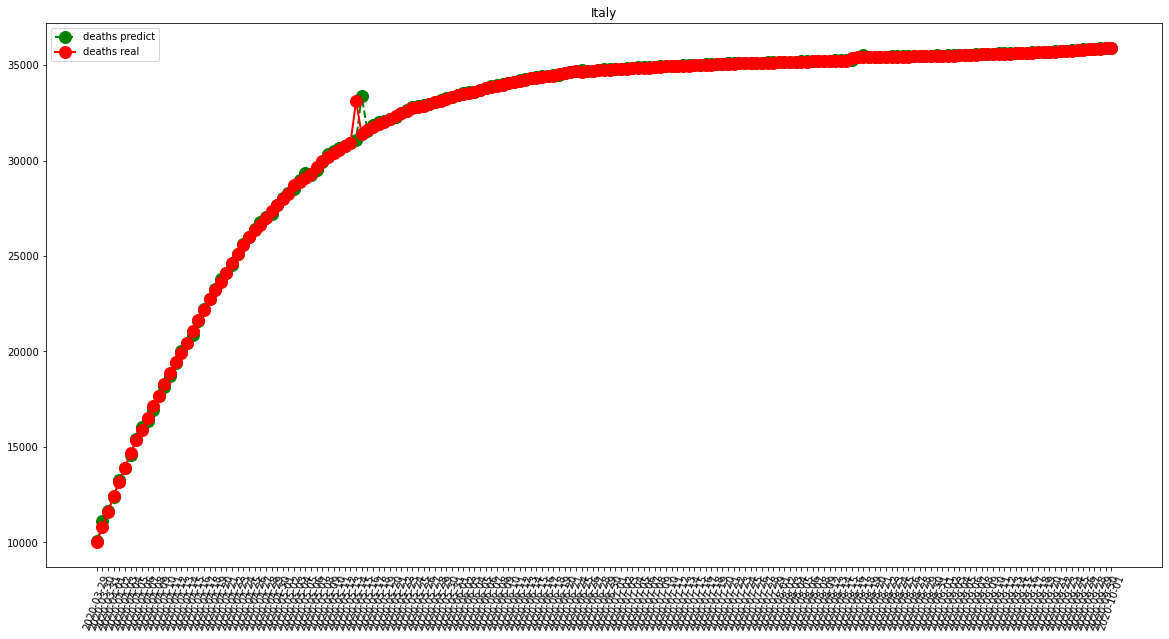

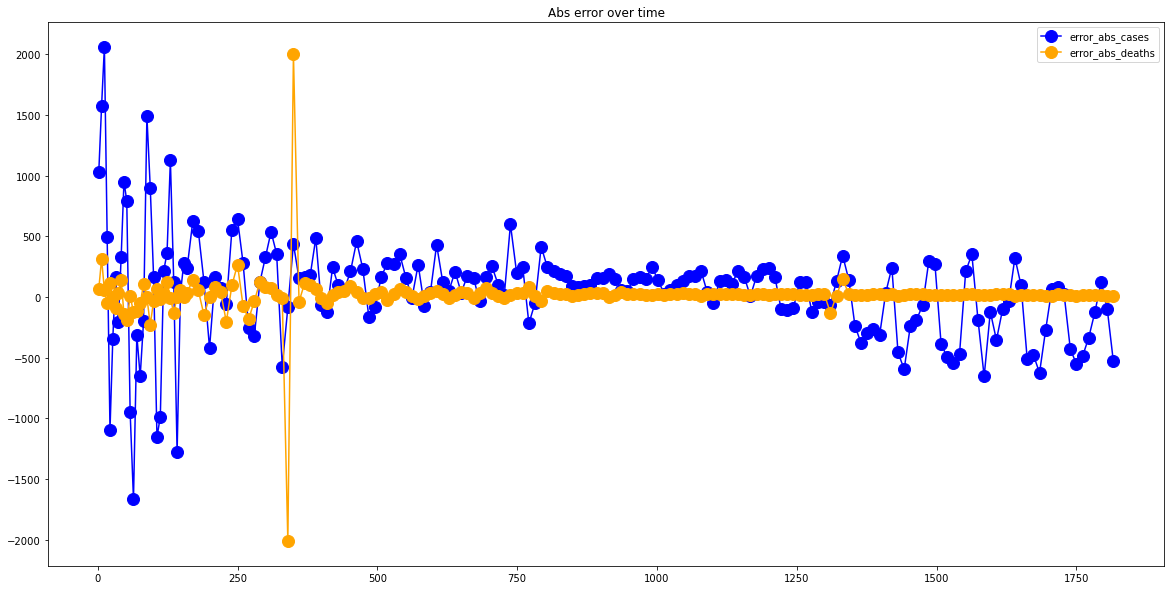

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2891.686813186813
RMSE =  5648.637871884895
-- Spain performances for deaths --
MAE =  119.36813186813187
RMSE =  304.07477210871514


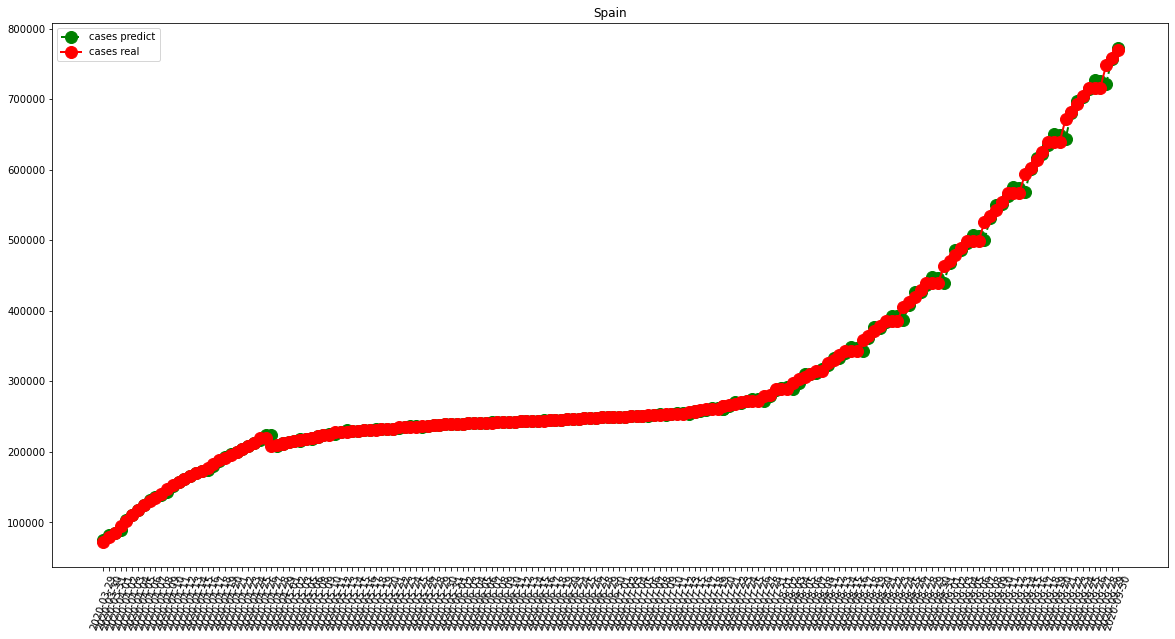

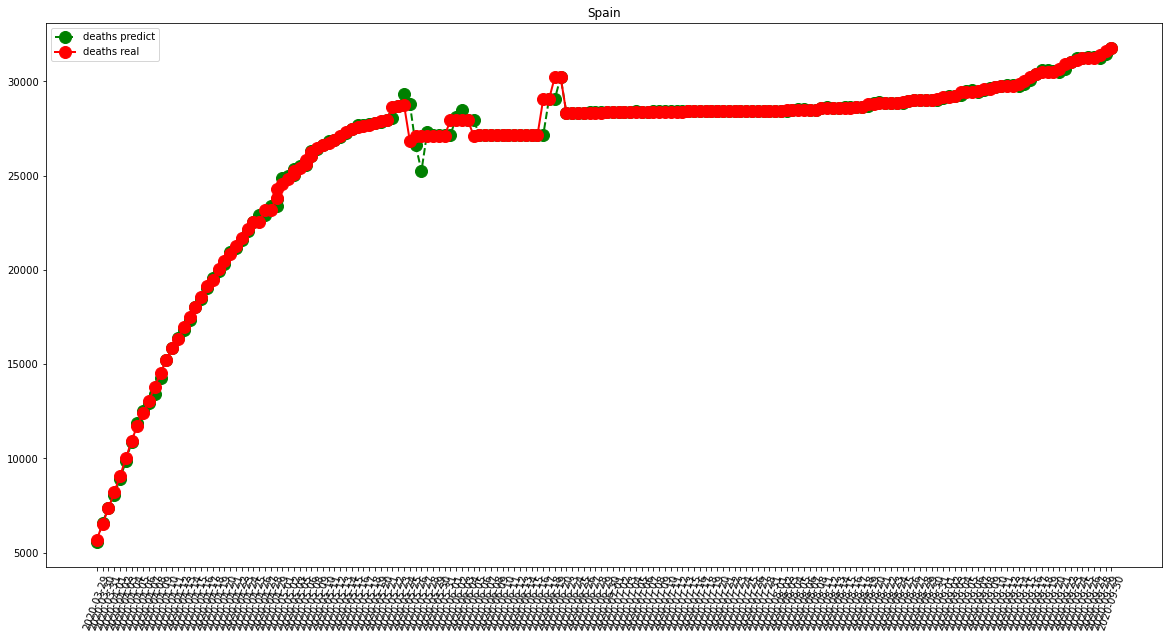

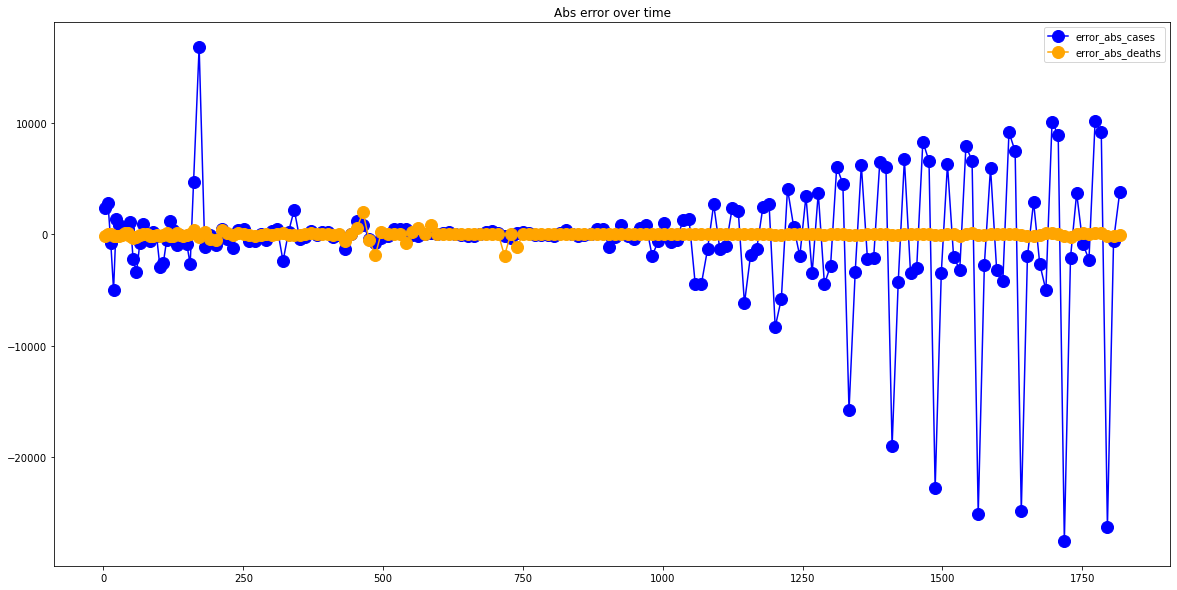

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16474.043956043955
RMSE =  23758.76910522943
-- United States performances for deaths --
MAE =  477.6978021978022
RMSE =  666.9275913380043


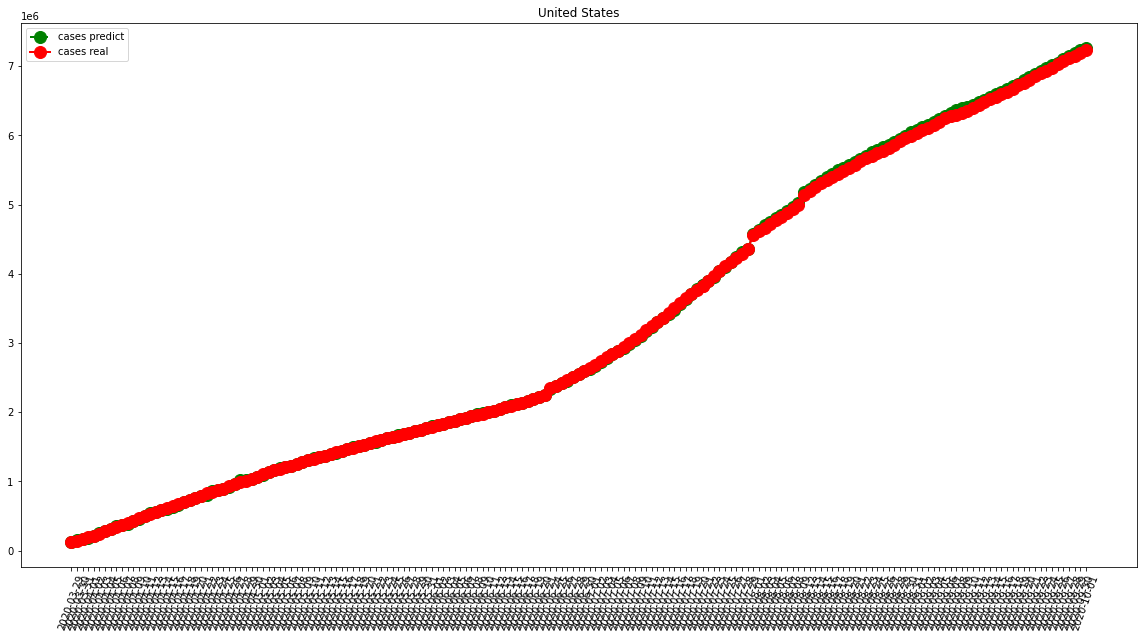

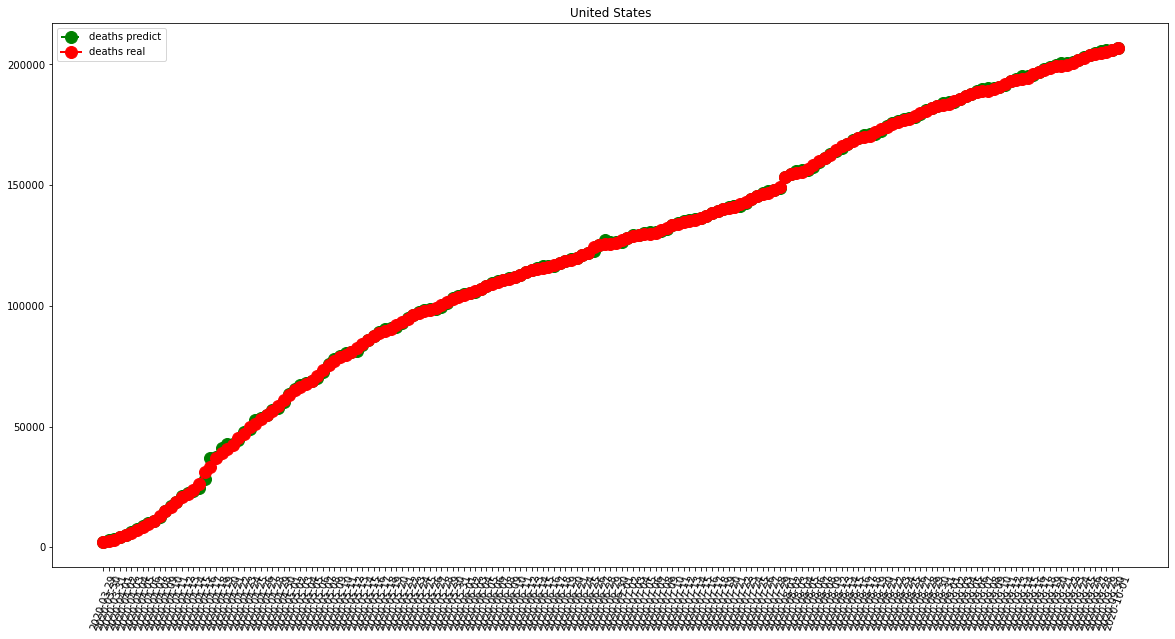

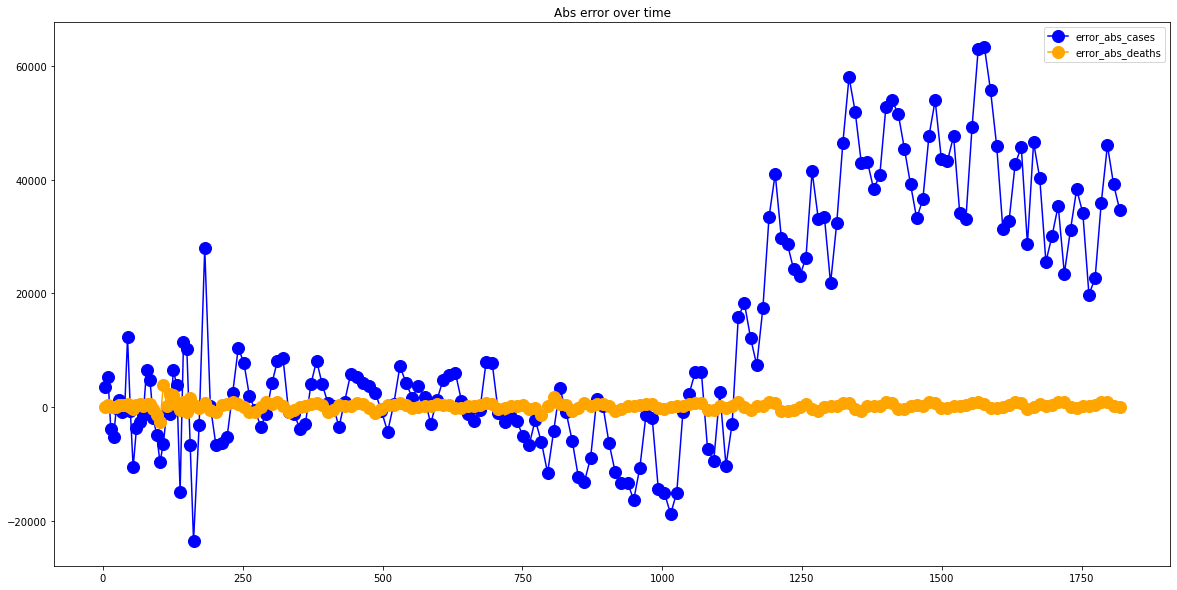

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  56.4010989010989
RMSE =  88.55447817245384
-- China performances for deaths --
MAE =  23.703296703296704
RMSE =  116.41107533881156


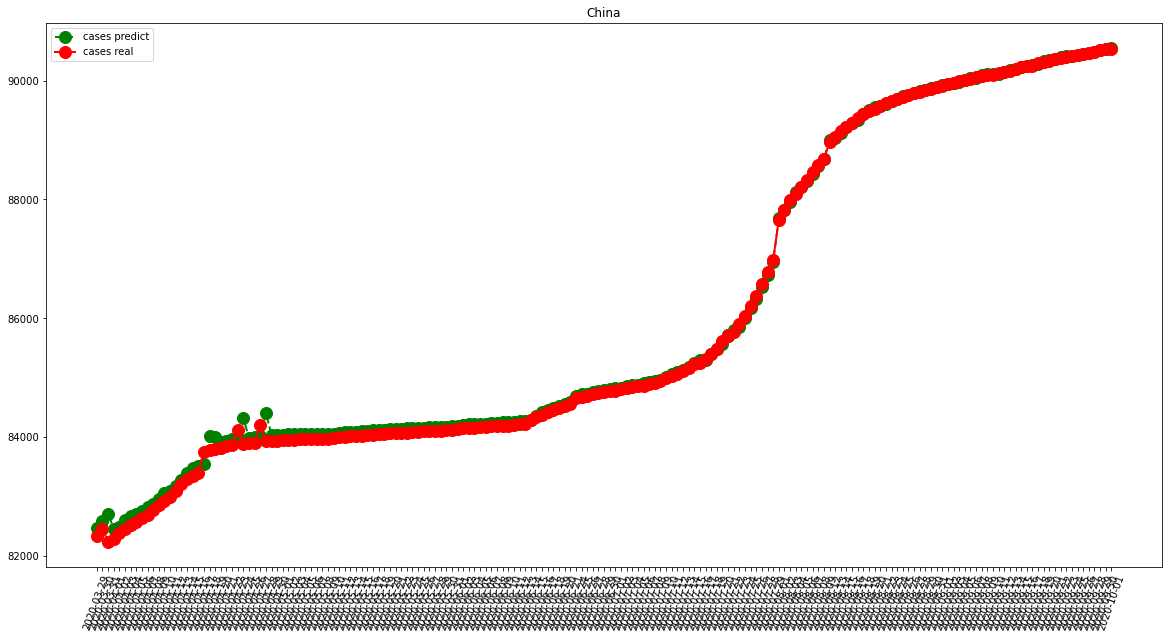

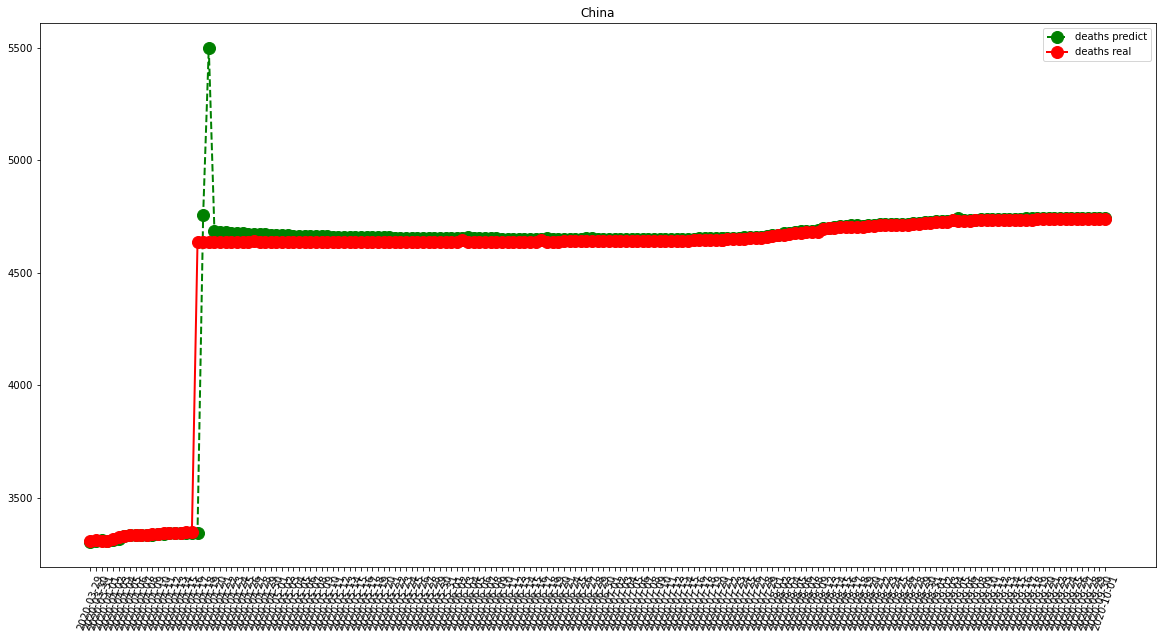

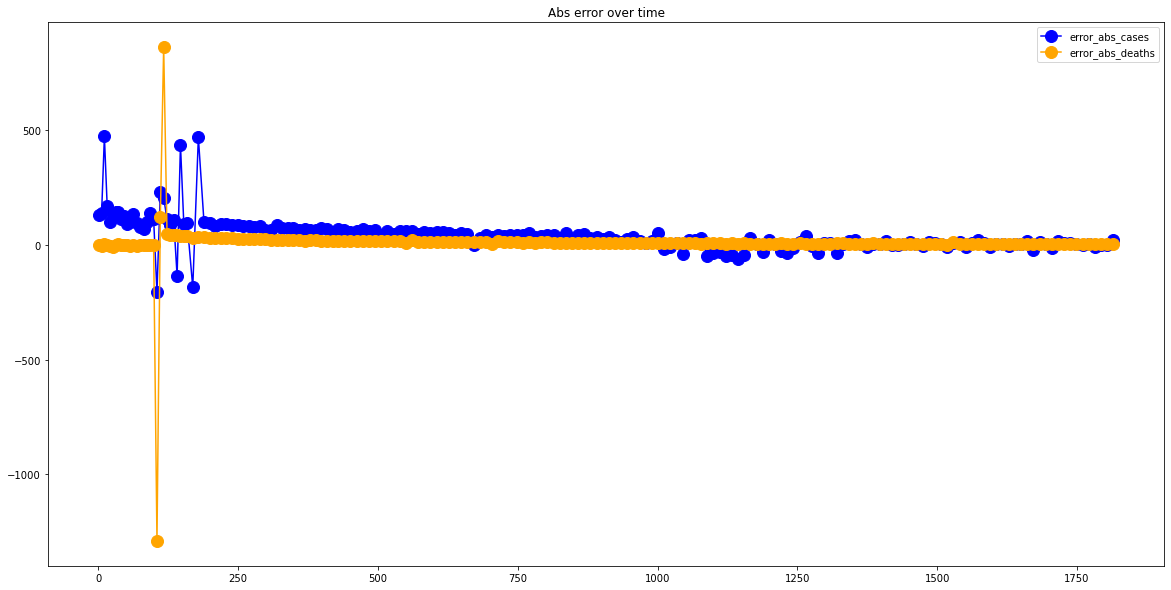

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1089.1883116883116
RMSE =  3440.2676287089726
-- United Kingdom performances for deaths --
MAE =  201.8961038961039
RMSE =  687.8309592999058


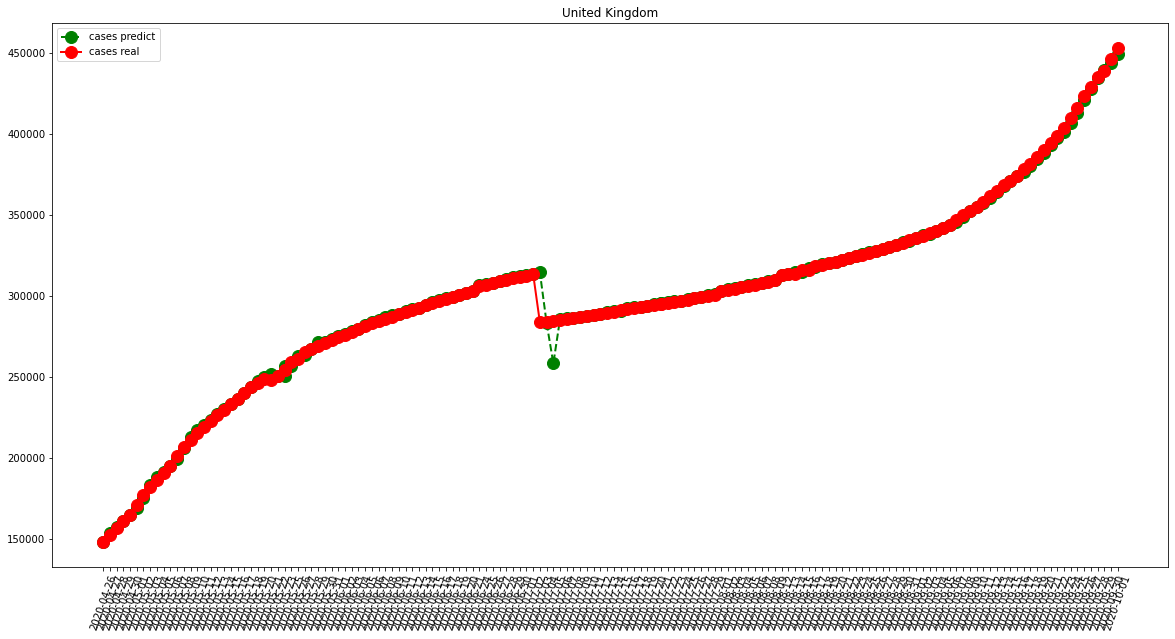

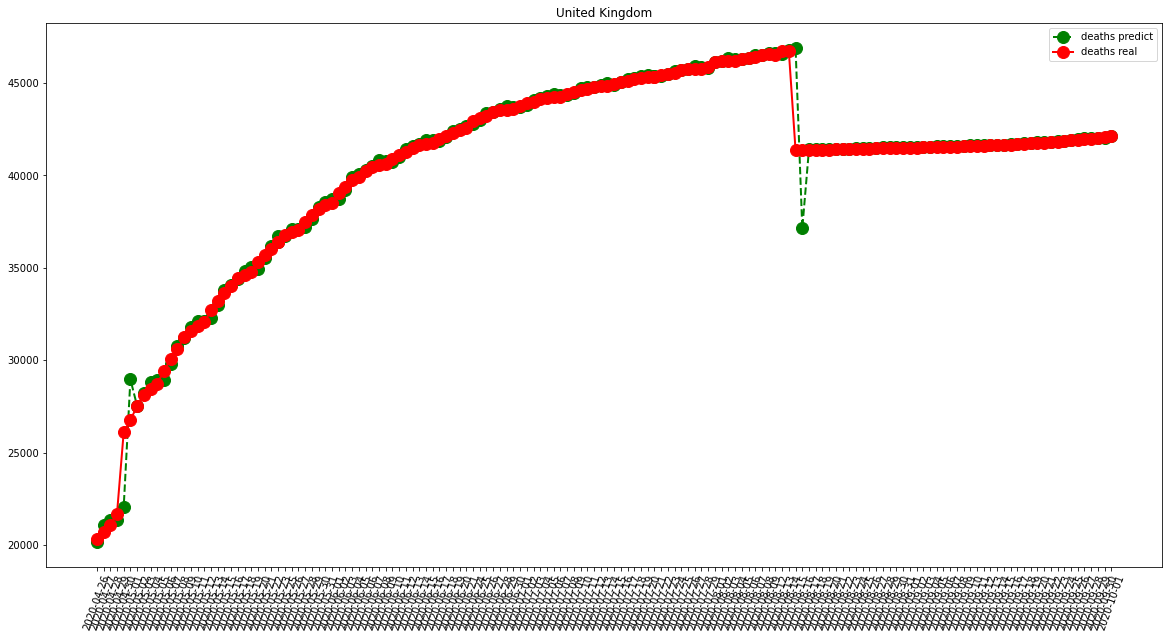

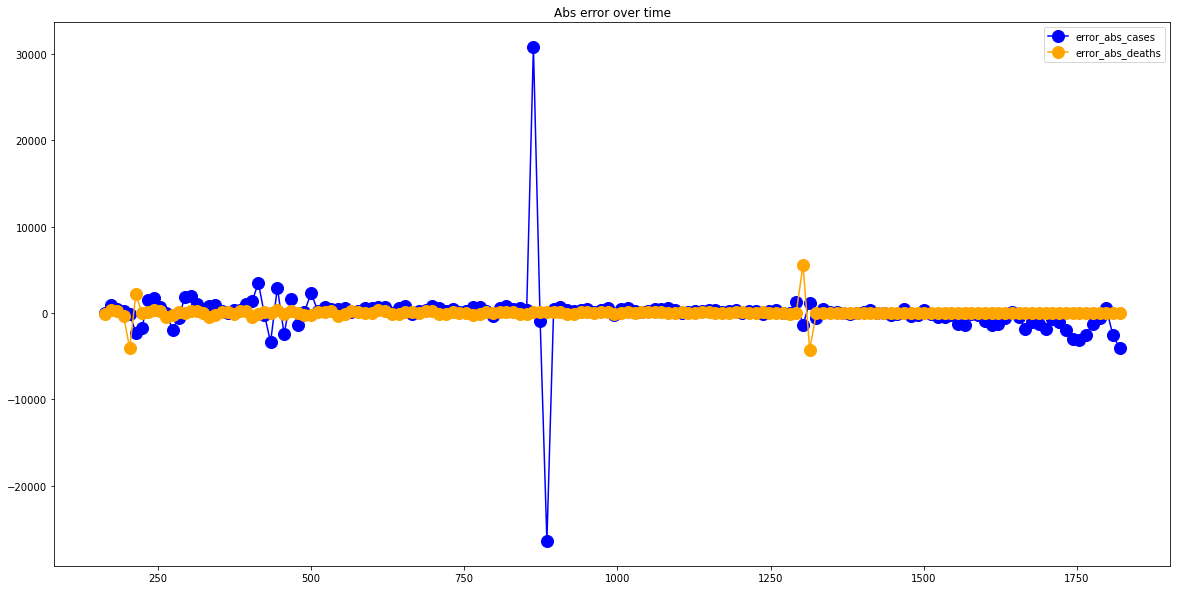

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  434.0779220779221
RMSE =  594.5510147085018
-- Germany performances for deaths --
MAE =  18.149350649350648
RMSE =  35.56985079690784


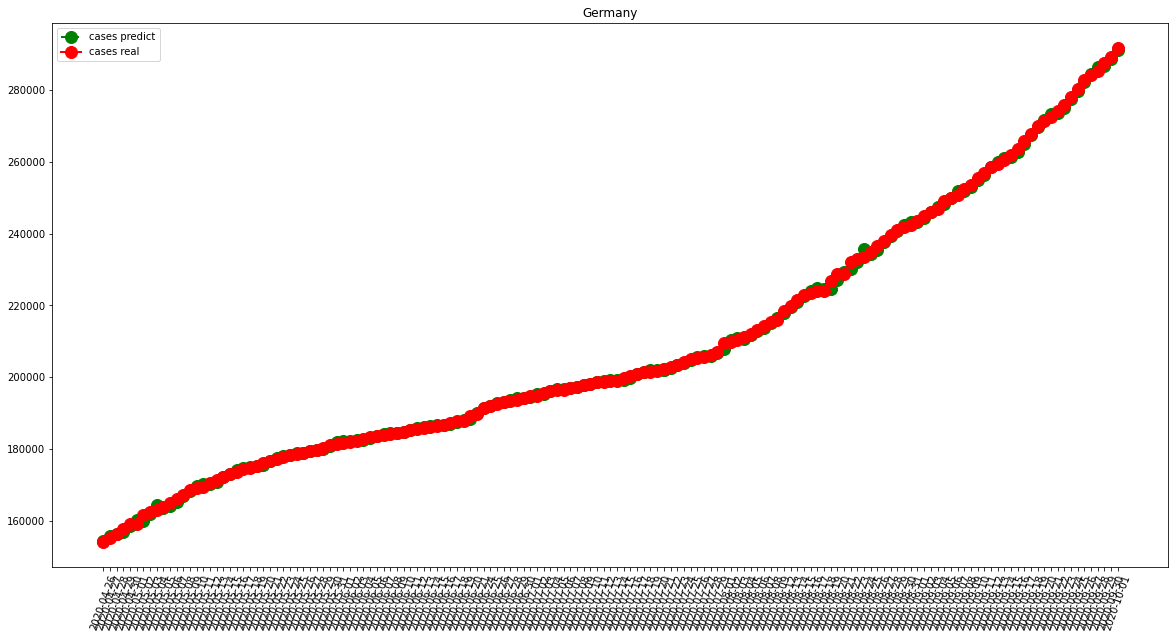

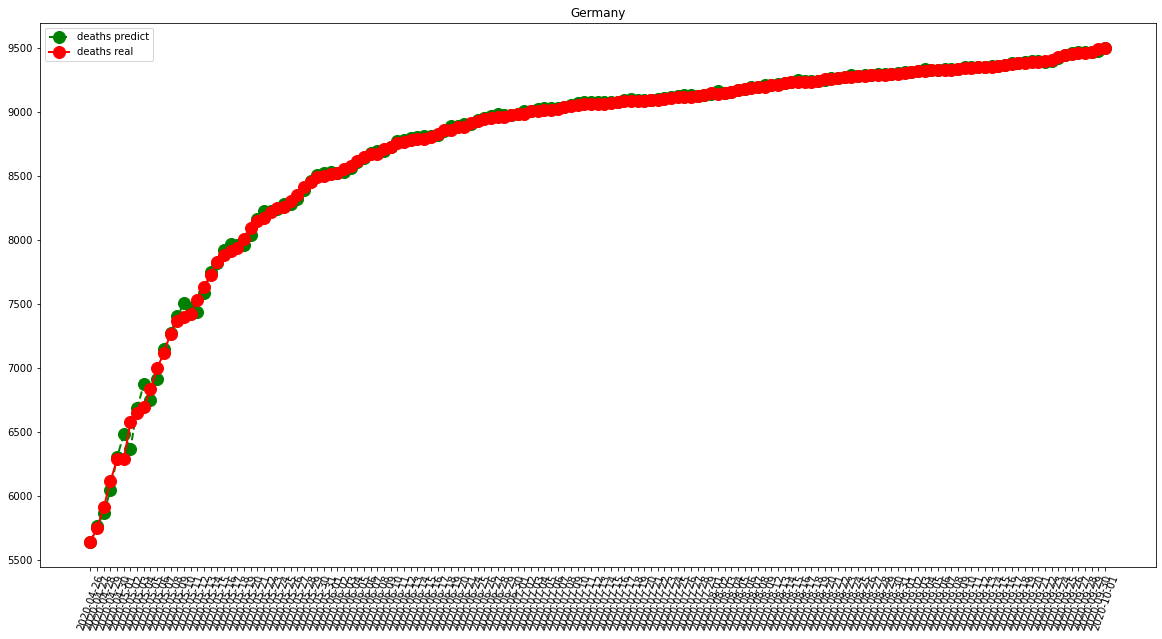

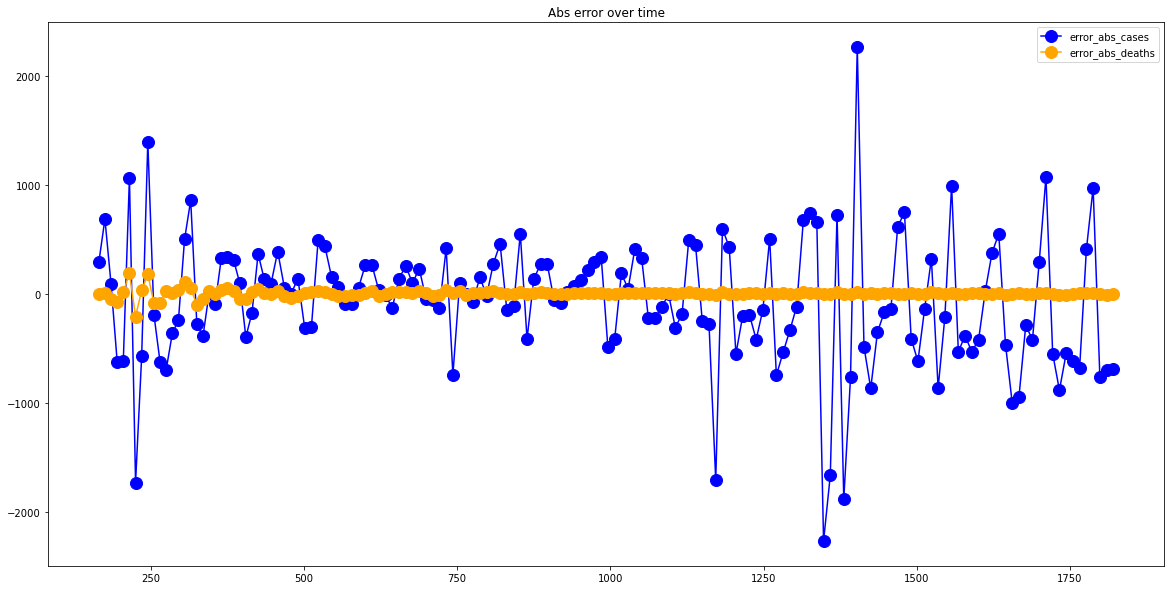

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  852.7012987012987
RMSE =  1199.307040179193
-- Iran performances for deaths --
MAE =  49.993506493506494
RMSE =  82.80469119027546


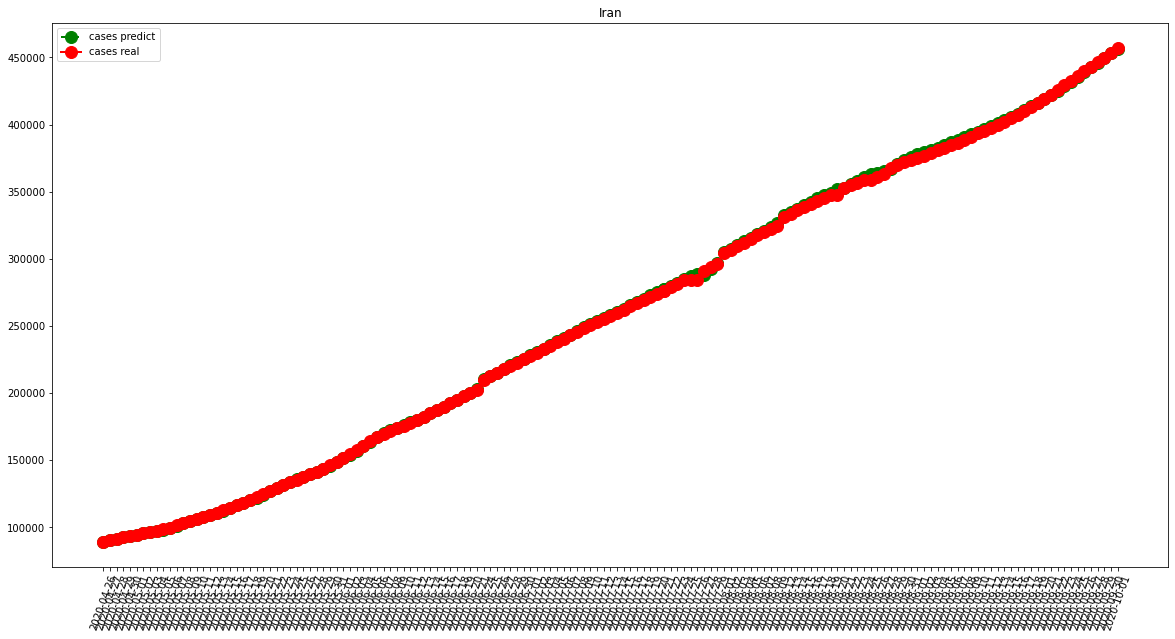

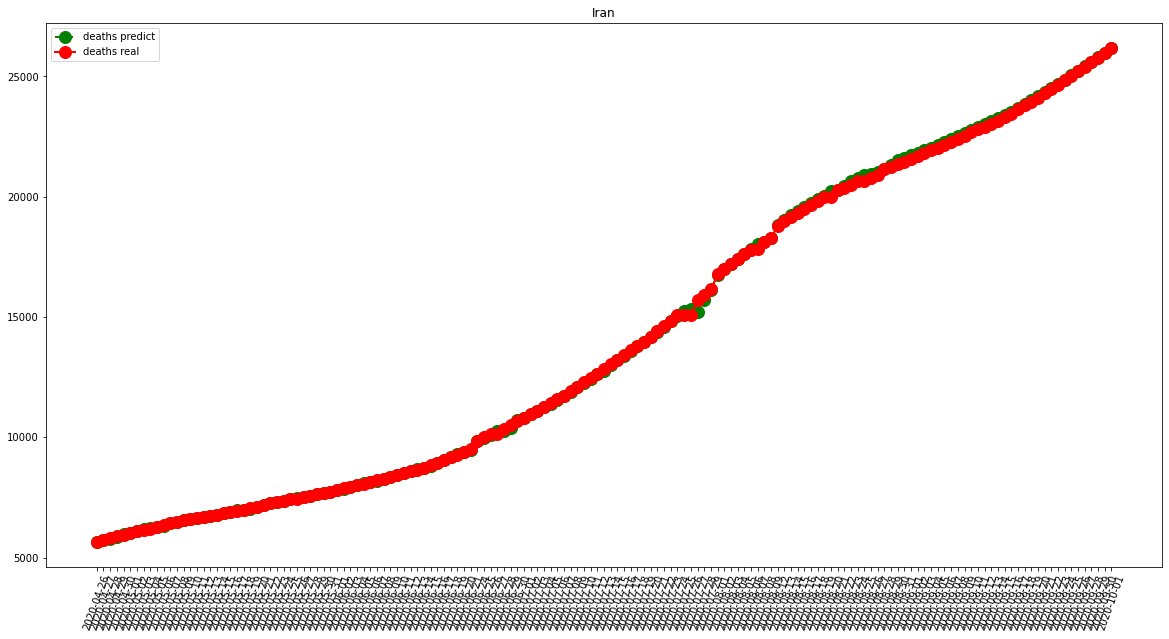

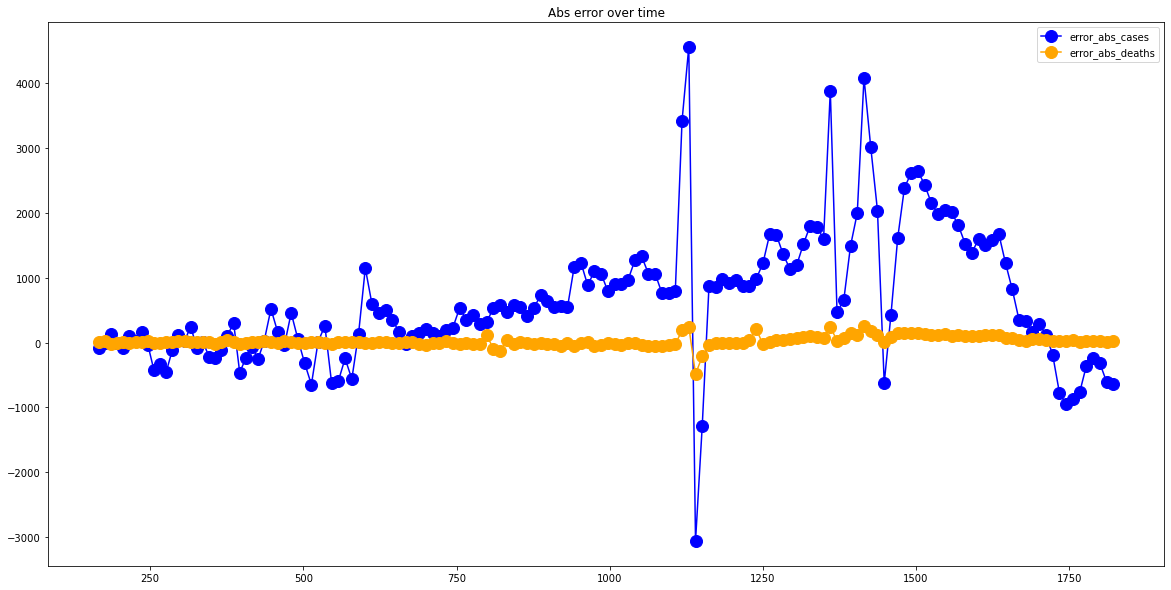

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.30519480519482
RMSE =  330.105404260636
-- Turkey performances for deaths --
MAE =  15.720779220779221
RMSE =  82.08377886797582


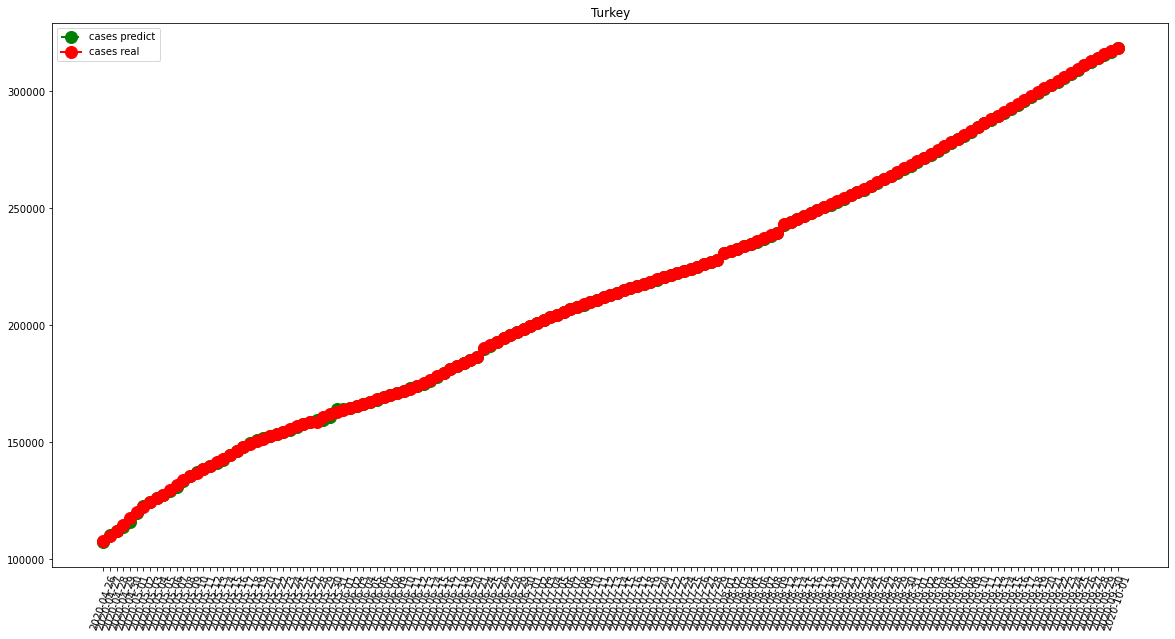

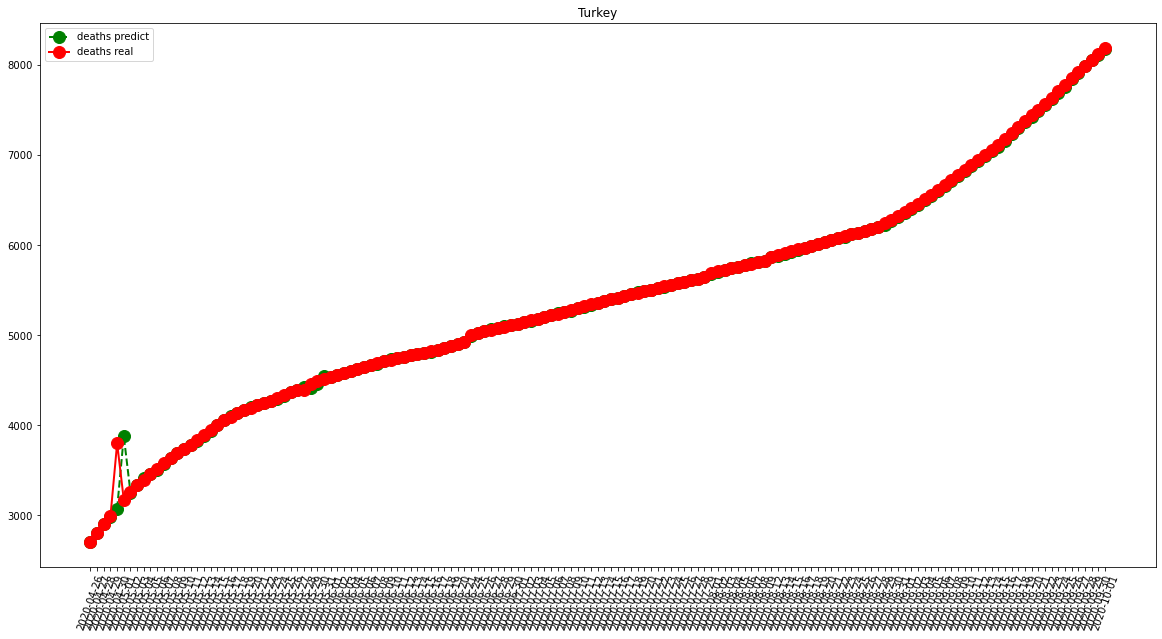

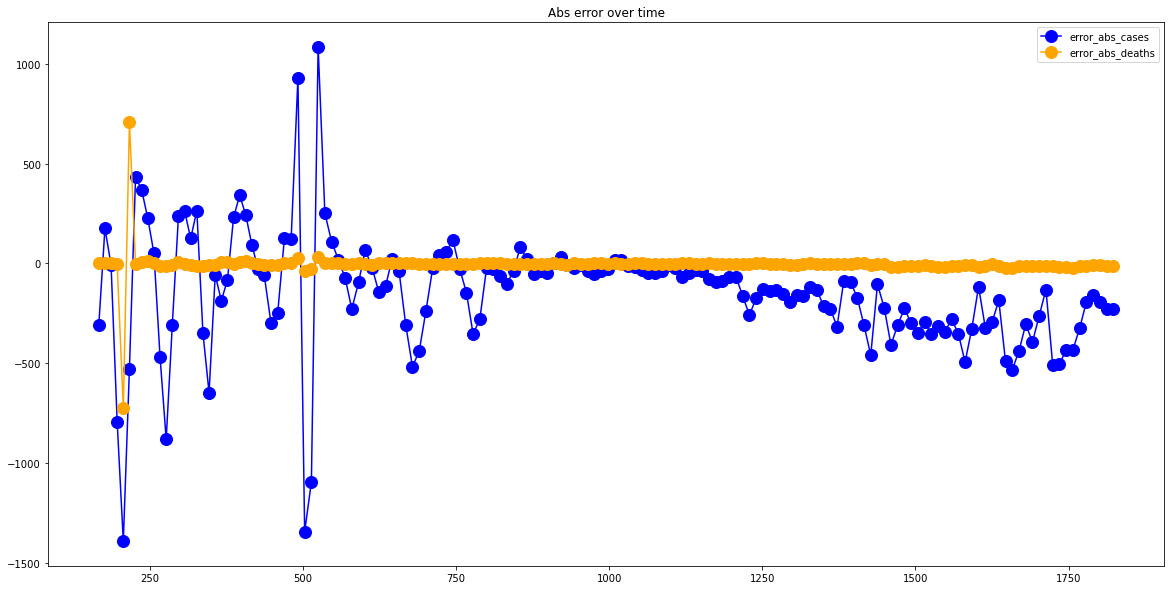

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17395.03149606299
RMSE =  22486.206151649687
-- Brazil performances for deaths --
MAE =  508.4173228346457
RMSE =  612.9034489993311


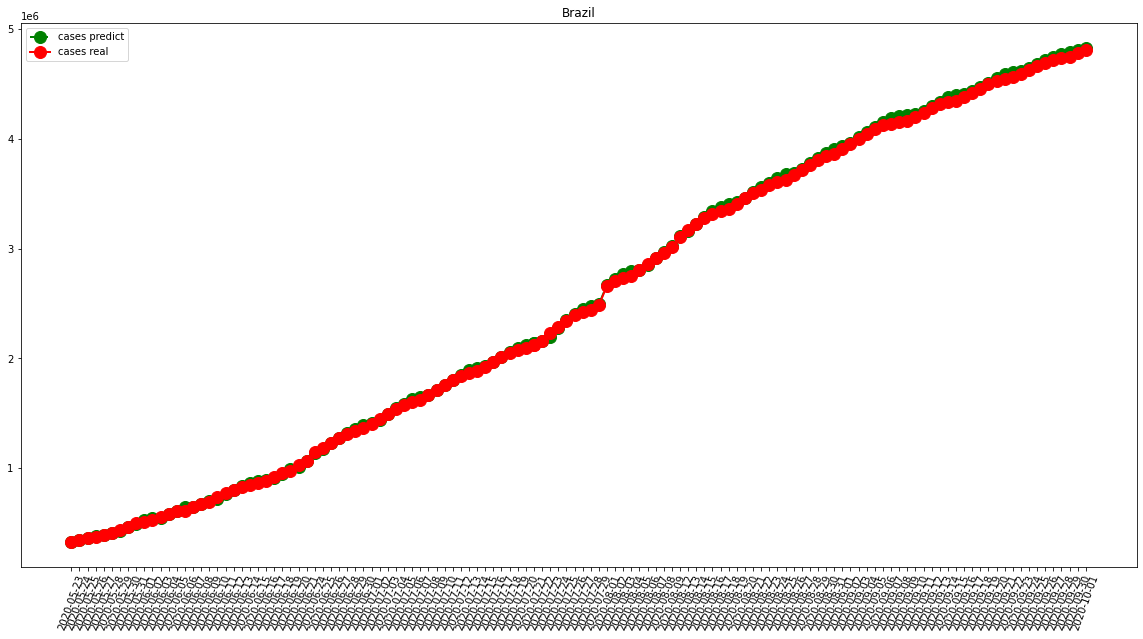

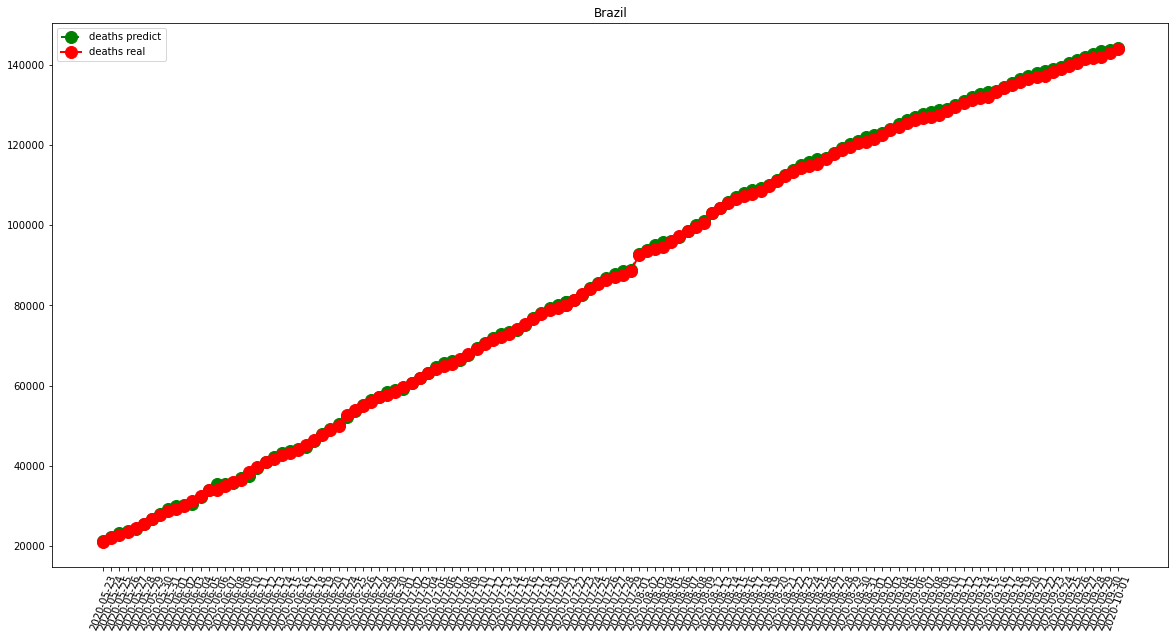

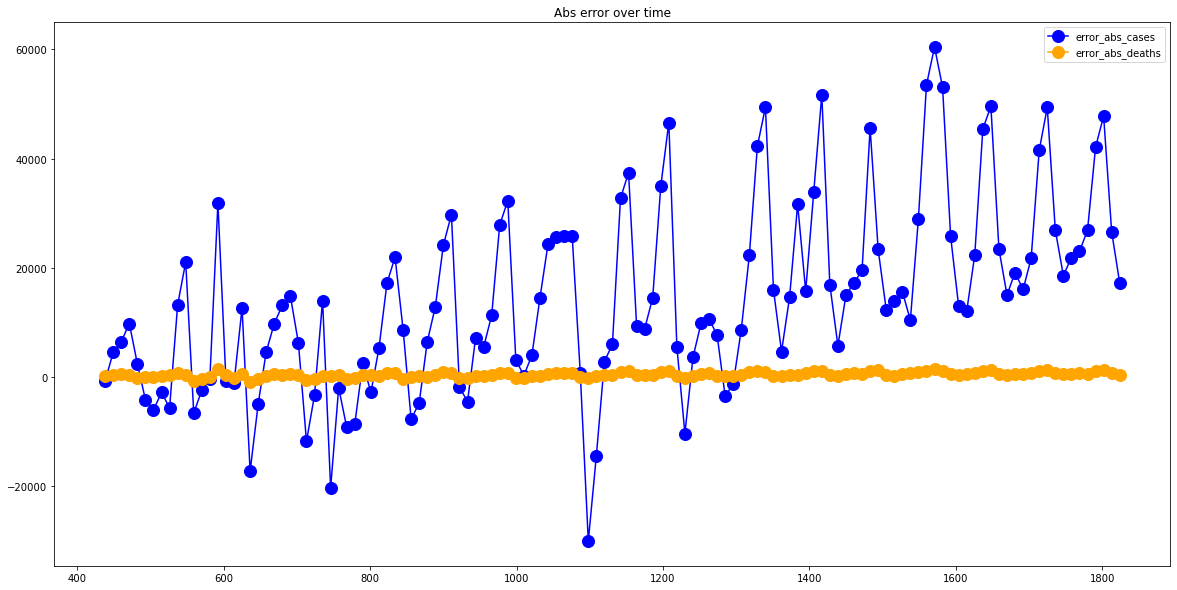

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)